# Rearranging & Cleaning the Data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold

In [4]:
# read in csv file
surveydf = pd.read_csv('/Users/Vishal/Desktop/College Stuff/Junior Year/Fall 2021/CS 105/Lab 5 + 6/CS 105 & CS 111 Survey (Responses)_ Vishal Mihir Raghav Ishika - Form Responses 1.csv')

# range of questions we want to analyze
viewdf = surveydf.loc[:, 'What is your gender?':'Rate your stress levels this quarter. 1 being not stressed, 5 being the most stressed.']

# remove questions we are not analyzing
viewdf = viewdf.drop(columns=['How many minutes on average is your roundtrip commute to school daily?', 'What general time frames are your classes in? Select all that apply.', 'Pineapple on pizza?', 'How long do you spend at the SRC each visit?', 'What is your opinion on participation credit in your classes?' , 'How much do you agree with the following statement? “More people participated in class before COVID than now.” Only answer if', 'How much do you agree with the following statement? “I eat out more than I eat homemade food.”', 'How much do you agree with the following statement? “I spend more time studying than I do on my hobbies.”', 'Do you think our politicians as a whole are focusing enough on climate change?', 'To what extent do you believe the effects of climate change, if left unaddressed, will impact our planet?', 'How many days in a month do you recycle?', 'How many times per week do you participate in your classes?', 'What kind of Apple devices do you have?', 'Unnamed: 39', 'Unnamed: 40', 'On average, how many hours do you study per week?', 'How many days a week during quarantine did you feel your mental health significantly declined?', 'On average, how many hours do you spend time on homework per week?', 'Unnamed: 44'])

viewdf['How many days of the week do you have classes?'] = viewdf['How many days of the week do you have classes?'].replace(['5 days'], '5')

viewdf['How many days of the week do you have classes?'] = viewdf['How many days of the week do you have classes?'].replace(['5 days '], '5')

viewdf['How many days of the week do you have classes?'] = viewdf['How many days of the week do you have classes?'].replace(['4/5'], '4')

viewdf['How many days of the week do you have classes?'] = viewdf['How many days of the week do you have classes?'].replace(['M-F'], '5')

viewdf['How many units are you taking this quarter?'] = viewdf['How many units are you taking this quarter?'].replace(['12ish'], '12')

viewdf['How many units are you taking this quarter?'] = viewdf['How many units are you taking this quarter?'].replace(['13 units'], '13')

viewdf['How many units are you taking this quarter?'] = viewdf['How many units are you taking this quarter?'].replace(['14 units'], '14')

viewdf['How many units are you taking this quarter?'] = viewdf['How many units are you taking this quarter?'].replace(['`17'], '17')

viewdf['How old are you?'] = viewdf['How old are you?'].replace(['forgor'], '19')

viewdf

,What is your gender?,Which class are you enrolled in?,What school year are you in?,What is your sexual orientation?,How many days of the week do you have classes?,How many hours do you work/volunteer in a week?,Does your job significantly affect your school life?,How are you paying for college?,How many units are you taking this quarter?,Do you attend in person lectures through zoom?,...,How was your mood during the previous quarter?,Do you feel like you’re doing better in your in person classes compared to your online classes during the last school year?,How much do you agree with the following statement? “My parents influence my decision to go to college.”,Do you feel like you are mentally present in your in person classes?,How are your grades in the classes you’re currently taking?,Do you think UCR has dedicated enough resources to student’s mental health?,What is your work status?,How old are you?,What is your current GPA?,"Rate your stress levels this quarter. 1 being not stressed, 5 being the most stressed."
0,Male,CS 111,Sophomore,Straight,5,0,Does not apply to me,My parents/relatives are paying for me,17,No,...,2,3,4,3,4,4,I don't work,19,3.5 - 4.0,4
1,Male,CS 111,Sophomore,Straight,2,0,Does not apply to me,My parents/relatives are paying for me,13,No,...,4,2,4,2,2,3,I don't work,19,3.5 - 4.0,4
2,Male,CS 111,Junior,Bisexual,4,30 to 40,Yes,Loan,12.5,Sometimes,...,4,5,3,4,5,3,Full time,21,3.5 - 4.0,4
3,Male,CS 111,Sophomore,Straight,5,About 20,Yes,My parents/relatives are paying for me,12,Yes,...,3,4,5,3,4,3,Part-time,19,3.5 - 4.0,4
4,Female,CS 111,Junior,Straight,2,0,Does not apply to me,My parents/relatives are paying for me,12,Sometimes,...,3,2,3,3,3,3,Full time,19,3.0 - 3.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Female,CS 111,Sophomore,Straight,5,19,Yes,Loan,13,No,...,5,1,1,5,1,1,Part-time,19,3.0 - 3.4,5
187,Male,CS 111,Sophomore,Bisexual,4,8,No,Scholarship,13,No,...,3,2,1,3,4,3,Part-time,20,3.5 - 4.0,3
188,Male,"CS 105, CS 111",Junior,Straight,3,0,Does not apply to me,FAFSA,12,Sometimes,...,1,4,4,4,2,3,I don't work,22,2.5 - 2.9,5
189,Male,CS 111,Junior,Straight,4,0,Does not apply to me,My parents/relatives are paying for me,13,No,...,4,3,3,3,3,2,I don't work,20,3.0 - 3.4,4


# Question 1: What information do you have?

The information we currently have is student’s general information (age, sex, what class they are taking). We also have information on their general mental wellness and academic performance. Some of these questions cover GPA, how active the students’ lives are, and how they would rate their mental health and its changes over the pandemic.

# Question 2: What would you like to know?

We would like to know the correlation between a well balanced life and general student mental health. The pandemic was key to realize how important mental health is and how important it is to maintain the work-life balance (sleep, extracurriculars, etc). Specifically, we would consider the mood of students in the previous quarter and whether or not they are mentally present in the classes they are currently taking.

# Question 3: Explore the Data

In [11]:
viewdf.groupby('How was your mood during the previous quarter?')['How was your mood during the previous quarter?'].count()
viewdf['How was your mood during the previous quarter?'].mean()
# We can see the average mood the previous quarter was around 3. Students were neither very happy nor very sad

3.0418848167539267

What is your current GPA?,1.5 - 1.9,2.0 - 2.4,2.5 - 2.9,3.0 - 3.4,3.5 - 4.0
How was your mood during the previous quarter?,,,,,
1,1,1,7,8,7
2,0,0,5,14,21
3,0,1,4,21,29
4,0,0,4,14,30
5,0,0,3,6,15


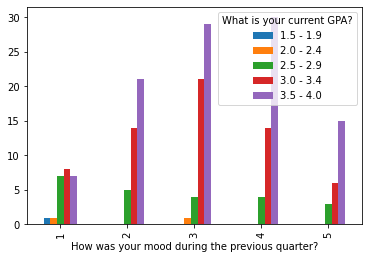

In [12]:
mood_gpa = pd.crosstab(viewdf['How was your mood during the previous quarter?'], viewdf['What is your current GPA?'])
# Bar plot
mood_gpa.plot(kind='bar')
# Display table
mood_gpa

In [13]:
viewdf.groupby('What is your current GPA?')['What is your current GPA?'].count()
# We can see that a majority of students have a GPA of 3.5-4.0. This is indicative of the fact that the majority of survey respondents care about school and their classes.

What is your current GPA?
1.5 - 1.9      1
2.0 - 2.4      2
2.5 - 2.9     23
3.0 - 3.4     63
3.5 - 4.0    102
Name: What is your current GPA?, dtype: int64

How are your grades in the classes you’re currently taking?,1,2,3,4,5
What is your work status?,,,,,
Full time,0.333333,0.0625,0.116883,0.015152,0.076923
I don't work,0.333333,0.6875,0.584416,0.500000,0.384615
Part-time,0.333333,0.1875,0.220779,0.409091,0.461538
Student Orgs/Volunteer Regulary,0.000000,0.0625,0.077922,0.075758,0.076923


<AxesSubplot:xlabel='What is your work status?'>

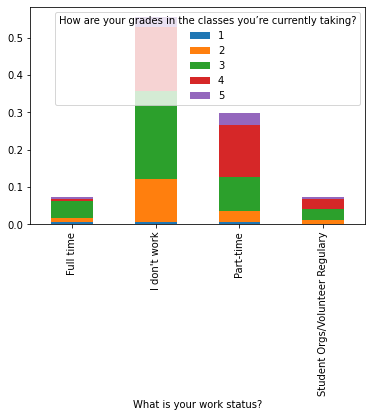

In [14]:
work_grades = pd.crosstab(viewdf['What is your work status?'], viewdf['How are your grades in the classes you’re currently taking?'])
work_grades_count = work_grades.sum(axis=0)
workbygrades = work_grades.divide(work_grades_count, axis=1)
display(workbygrades)

pd.crosstab(viewdf["What is your work status?"], viewdf["How are your grades in the classes you’re currently taking?"],normalize=True).plot.bar(stacked = True)

<AxesSubplot:xlabel='How old are you?', ylabel='How many units are you taking this quarter?'>

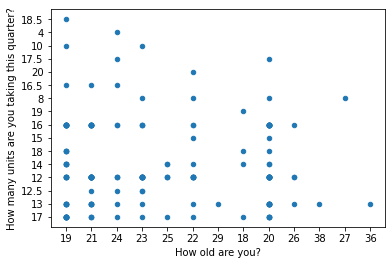

In [15]:
viewdf.plot.scatter("How old are you?", "How many units are you taking this quarter?")

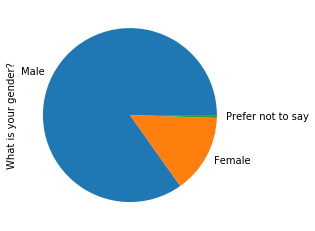

In [5]:
viewdf['What is your gender?'].value_counts().plot(kind='pie')

# Question 4: State clearly each of your hypotheses

Our first hypothesis is that current GPA and mood from the previous quarter are dependent on each other. Our second hypothesis is that Grades and Work status are dependent of each other. Our third and final hypothesis is that age and the number of units taken this quarter are independent of each other. For the first 2 hypotheses we will test it using the chi square test of independence and for the 3rd hypothesis we will test using linear regression.

# Question 5: Test your hypotheses

In [30]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(mood_gpa)
p
print(f'Chi-value : {c}')
print(f'p-val : {p}')
print(f'dof : {dof}')
print(f'expected : {expected}')

Chi-value : 23.059790912412396
p-val : 0.11214547630443732
dof : 16
expected : [[ 0.12565445  0.2513089   2.89005236  7.91623037 12.81675393]
 [ 0.20942408  0.41884817  4.81675393 13.19371728 21.36125654]
 [ 0.28795812  0.57591623  6.62303665 18.14136126 29.37172775]
 [ 0.2513089   0.5026178   5.78010471 15.83246073 25.63350785]
 [ 0.12565445  0.2513089   2.89005236  7.91623037 12.81675393]]


In [31]:
c, p, dof, expected = chi2_contingency(work_grades)
p
print(f'Chi-value : {c}')
print(f'p-val : {p}')
print(f'dof : {dof}')
print(f'expected : {expected}')

Chi-value : 17.354175945545286
p-val : 0.13675305652795908
dof : 12
expected : [[ 0.21989529  2.34554974  5.64397906  4.83769634  0.95287958]
 [ 1.66492147 17.7591623  42.73298429 36.62827225  7.21465969]
 [ 0.89528796  9.54973822 22.97905759 19.69633508  3.87958115]
 [ 0.21989529  2.34554974  5.64397906  4.83769634  0.95287958]]


In [5]:
X = pd.DataFrame(viewdf["How old are you?"])
y = pd.DataFrame(viewdf["How many units are you taking this quarter?"])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
score = model.score(X.iloc[test,:], y.iloc[test,:])
scores.append(score)
print(scores)
#sns.lmplot(x="How old are you?", y="How many units are you taking this quarter?", data=viewdf);

[0.08542027882848446]
